In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [14]:
def downsample_image(image_array, downsampling_factor):
    image_array *= 255
    height, width, channels = image_array.shape
    downsampled_height = height // downsampling_factor
    downsampled_width = width // downsampling_factor

    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=np.uint8)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            block = image_array[i*downsampling_factor:(i+1)*downsampling_factor,
                                 j*downsampling_factor:(j+1)*downsampling_factor, :]
            downsampled_image[i, j] = np.mean(block, axis=(0, 1))

    return downsampled_image/255

def pansharpen_hsv(sample):
    pan_hr = sample['guide']
    rgb_upsampled = sample['y_bicubic']
    hsi = cv2.cvtColor(rgb_upsampled, cv2.COLOR_RGB2HSV)
    hsi[:, :, 2] = pan_hr
    target = cv2.cvtColor(hsi, cv2.COLOR_HSV2RGB)
    return {'y_pred': target}

def pansharpen_pixel_average(sample):
    gs_image = sample['guide']
    bicubic_image = sample['y_bicubic']
    rgb_bw = np.mean(bicubic_image, axis=2)
    pansharpen_factor = gs_image / rgb_bw
    pan_image = np.zeros_like(bicubic_image)
    pan_image[:,:,0] = bicubic_image[:,:,0] * pansharpen_factor
    pan_image[:,:,1] = bicubic_image[:,:,1] * pansharpen_factor
    pan_image[:,:,2] = bicubic_image[:,:,2] * pansharpen_factor
    pan_image = np.clip(pan_image, 0, 1)
    return {'y_pred': pan_image}


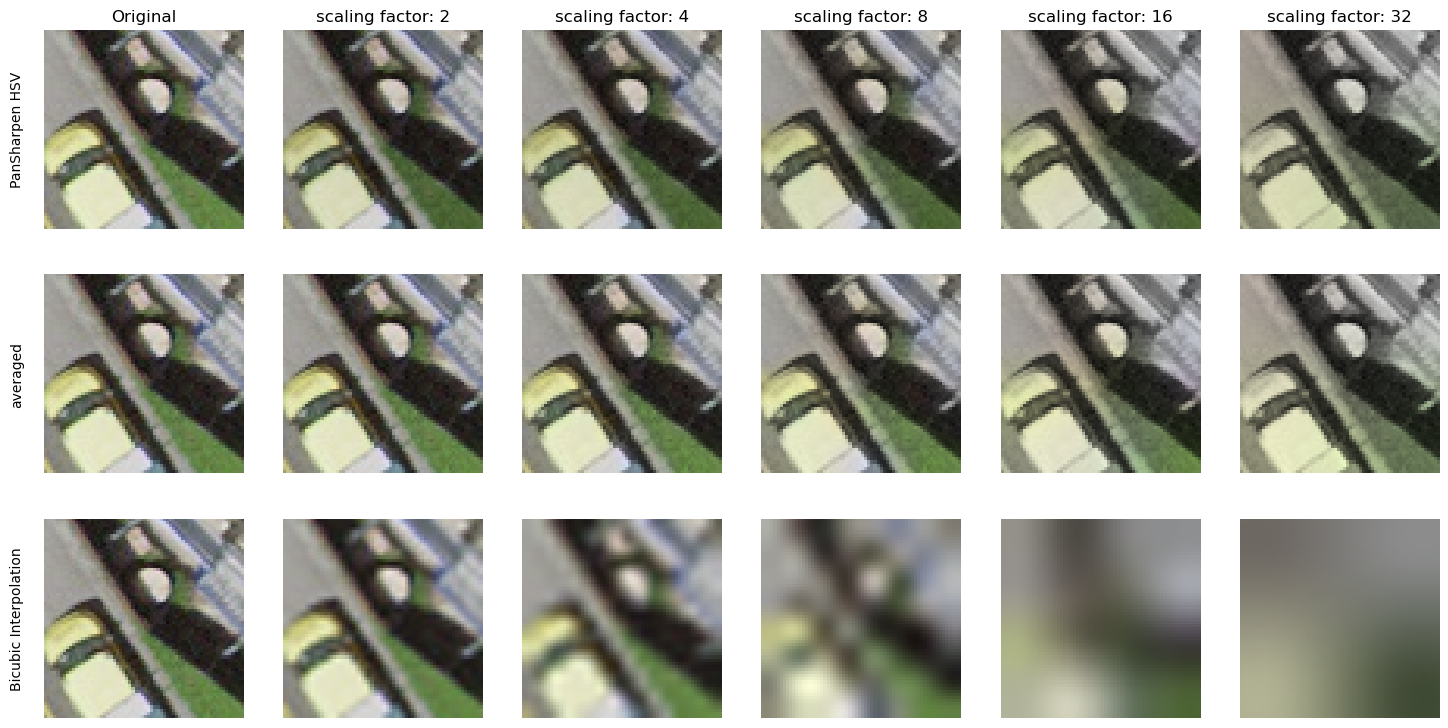

In [15]:
image = plt.imread('/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_car/original.png')
save_path = '/scratch2/merler/code/data/pan10/output_images/comparison_scale_pixel_average_matched/'

fig,axis = plt.subplots(3,6, figsize = (18,9))
axis[0,0].imshow(image)
axis[0,0].axis('off')
axis[0,0].set_title('Original')   
axis[1,0].imshow(image)
axis[1,0].axis('off')
axis[2,0].imshow(image)
axis[2,0].axis('off')

downsampling_factors = [2,4,8,16,32]
i = 1
for downsampling_factor in downsampling_factors:
    shape = image.shape
    ds_image = cv2.resize(image,(shape[0]//downsampling_factor, shape[1]//downsampling_factor), interpolation=cv2.INTER_AREA)
    bicubic_image = cv2.resize(ds_image, (shape[0], shape[1]), interpolation=cv2.INTER_CUBIC)
    sample = {'guide': np.mean(image, axis=2)}
    sample['y_bicubic'] = bicubic_image
    pan_image_1 = pansharpen_hsv(sample)['y_pred']
    pan_image_2 = pansharpen_pixel_average(sample)['y_pred']
    axis[0,i].imshow(pan_image_1)
    axis[0,i].axis('off')
    axis[0,i].set_title('scaling factor: {}'.format(downsampling_factor))
    axis[1,i].imshow(pan_image_2)
    axis[1,i].axis('off')
    axis[2,i].imshow(bicubic_image)
    axis[2,i].axis('off')
    row_labels = ["Row 1", "Row 2", "Row 3"]
    i+=1

annotations = ['PanSharpen HSV', 'averaged', 'Bicubic Interpolation']

for i, (ax, annotation) in enumerate(zip(axis[:, 0], annotations)):
    ax.annotate(annotation, xy=(-0.1, 0.5), xycoords='axes fraction', rotation=90, ha='right', va='center')


graph 2 1.png
graph 4 1.png
graph 8 1.png
graph 16 1.png
graph 32 1.png


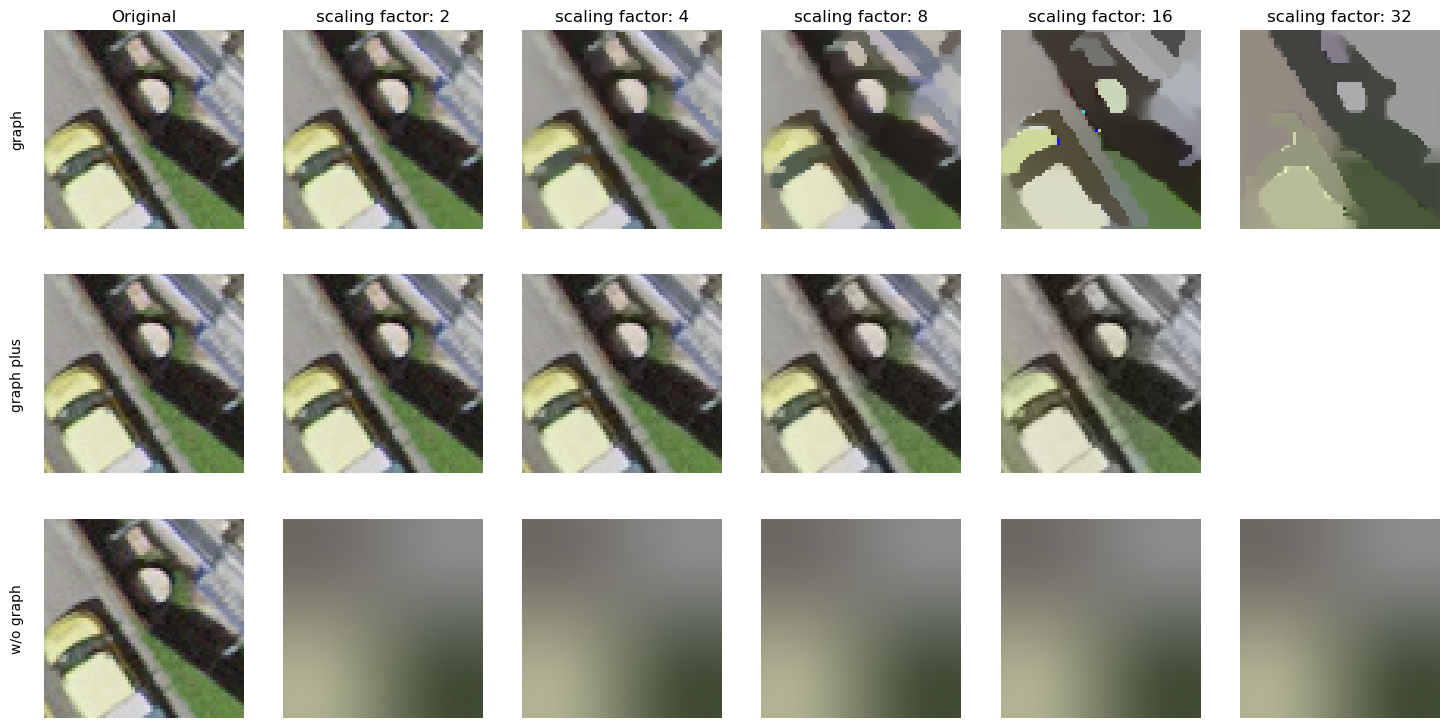

In [16]:
image = plt.imread('/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_car/original.png')
image_path = '/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_car/'
save_path = '/scratch2/merler/code/data/pan10/output_images/comparison_scale_pixel_average_matched/'


fig,axis = plt.subplots(3,6, figsize = (18,9))
axis[0,0].imshow(image)
axis[0,0].axis('off')
axis[0,0].set_title('Original')   
axis[1,0].imshow(image)
axis[1,0].axis('off')
axis[2,0].imshow(image)
axis[2,0].axis('off')

downsampling_factors = [2,4,8,16,32]
i = 1
for downsampling_factor in downsampling_factors:
    pan_image_1 = plt.imread(image_path + 'graph ' + str(downsampling_factor) + ' 107' + '.png')
    pan_image_2 = plt.imread(image_path + 'graph-plus ' + str(downsampling_factor) + ' 107' + '.png')
    axis[0,i].imshow(pan_image_1)
    axis[0,i].axis('off')
    axis[0,i].set_title('scaling factor: {}'.format(downsampling_factor))
    axis[1,i].imshow(pan_image_2)
    axis[1,i].axis('off')
    axis[2,i].imshow(bicubic_image)
    axis[2,i].axis('off')
    row_labels = ["Row 1", "Row 2", "Row 3"]
    print( 'graph ' + str(downsampling_factor) + ' 1' + '.png')
    i+=1

annotations = ['graph', 'graph plus', 'w/o graph']

for i, (ax, annotation) in enumerate(zip(axis[:, 0], annotations)):
    ax.annotate(annotation, xy=(-0.1, 0.5), xycoords='axes fraction', rotation=90, ha='right', va='center')

graph 2 1.png
graph 4 1.png
graph 8 1.png
graph 16 1.png
graph 32 1.png


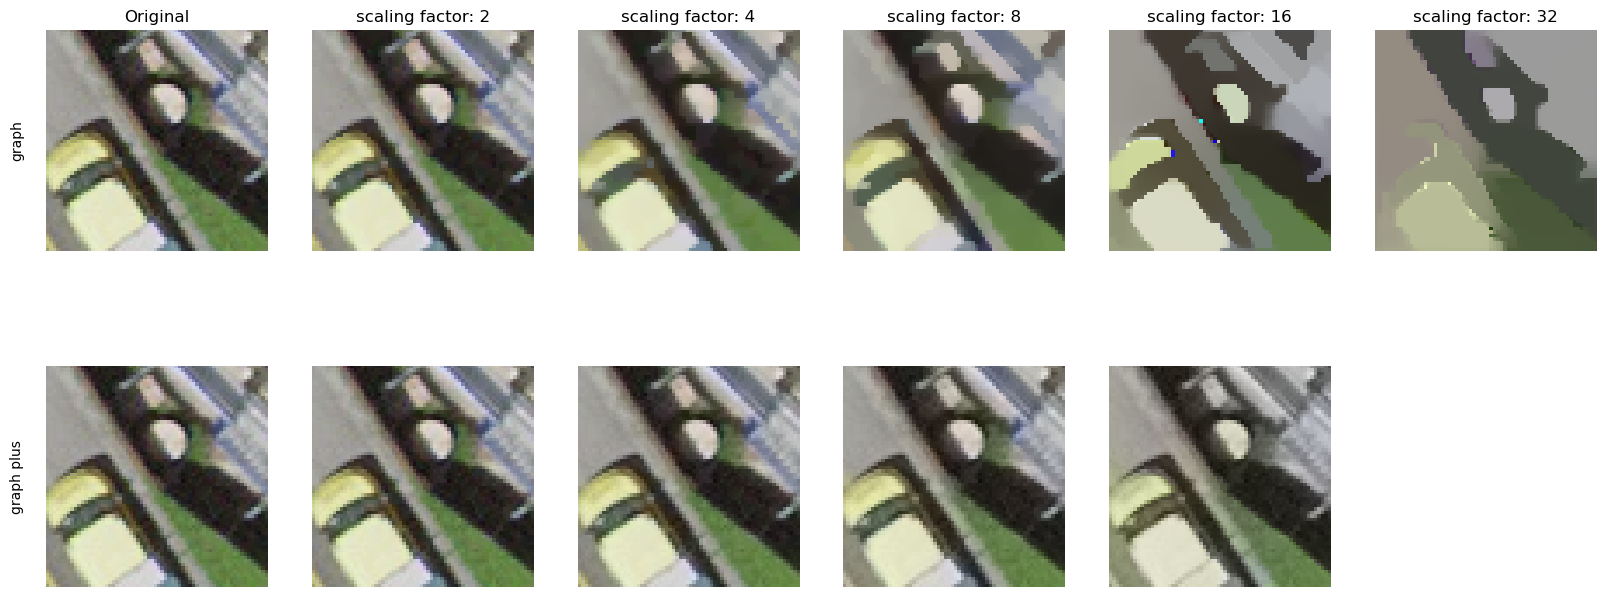

In [17]:
image = plt.imread('/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_car/original.png')
image_path = '/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_car/'
save_path = '/scratch2/merler/code/data/pan10/output_images/comparison_scale_pixel_average_matched/'

fig,axis = plt.subplots(2,6, figsize = (20,8))
axis[0,0].imshow(image)
axis[0,0].axis('off')
axis[0,0].set_title('Original')   
axis[1,0].imshow(image)
axis[1,0].axis('off')

downsampling_factors = [2,4,8,16,32]
i = 1
for downsampling_factor in downsampling_factors:
    pan_image_1 = plt.imread(image_path + 'graph ' + str(downsampling_factor) + ' 107' + '.png')
    pan_image_2 = plt.imread(image_path + 'graph-plus ' + str(downsampling_factor) + ' 107' + '.png')
    axis[0,i].imshow(pan_image_1)
    axis[0,i].axis('off')
    axis[0,i].set_title('scaling factor: {}'.format(downsampling_factor))
    axis[1,i].imshow(pan_image_2)
    axis[1,i].axis('off')
    row_labels = ["Row 1", "Row 2", "Row 3"]
    print( 'graph ' + str(downsampling_factor) + ' 1' + '.png')
    i+=1

annotations = ['graph', 'graph plus', 'w/o graph']

for i, (ax, annotation) in enumerate(zip(axis[:, 0], annotations)):
    ax.annotate(annotation, xy=(-0.1, 0.5), xycoords='axes fraction', rotation=90, ha='right', va='center')

graph 2 1.png
graph 4 1.png
graph 8 1.png
graph 32 1.png


Text(-0.1, 0.5, 'graph plus')

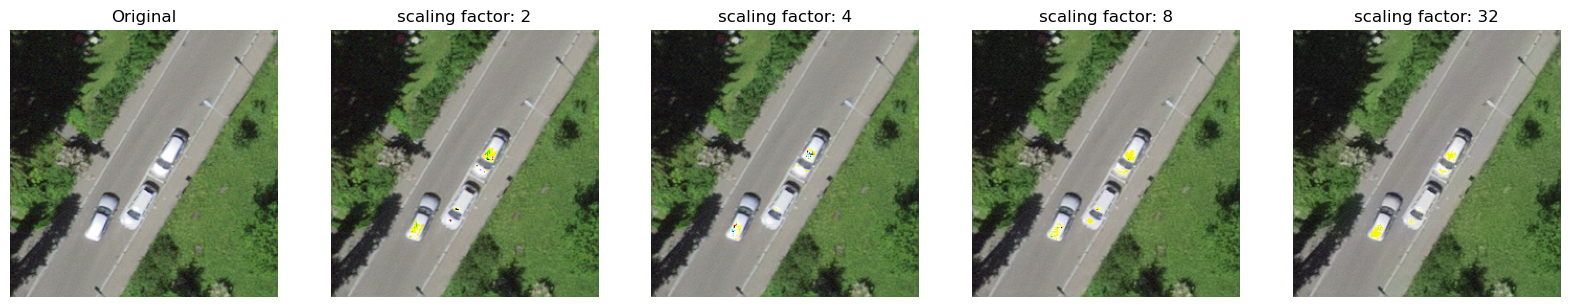

In [18]:
image = plt.imread('/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_graph/original.png')
image_path = '/scratch2/merler/code/data/pan10/output_images/output_images_evaluation_graph/'
save_path = '/scratch2/merler/code/data/pan10/output_images/comparison_scale_pixel_average_matched/'

fig,axis = plt.subplots(1,5, figsize = (20,8))
axis[0].imshow(image)
axis[0].axis('off')
axis[0].set_title('Original')   


downsampling_factors = [2,4,8,32]
i = 1
for downsampling_factor in downsampling_factors:
    pan_image_1 = plt.imread(image_path + 'w_o_graph ' + str(downsampling_factor) + ' 8' + '.png')
    axis[i].imshow(pan_image_1)
    axis[i].axis('off')
    axis[i].set_title('scaling factor: {}'.format(downsampling_factor))

    row_labels = ["Row 1", "Row 2", "Row 3"]
    print( 'graph ' + str(downsampling_factor) + ' 1' + '.png')
    i+=1

annotations = ['w/o graph']


ax.annotate(annotation, xy=(-0.1, 0.5), xycoords='axes fraction', rotation=90, ha='right', va='center')